In [1]:
import json
import pandas as pd
from PIL import Image

from tqdm.notebook import tqdm

import base64
from openai import OpenAI

client = OpenAI(base_url='http://localhost:8000/v1', api_key='1')

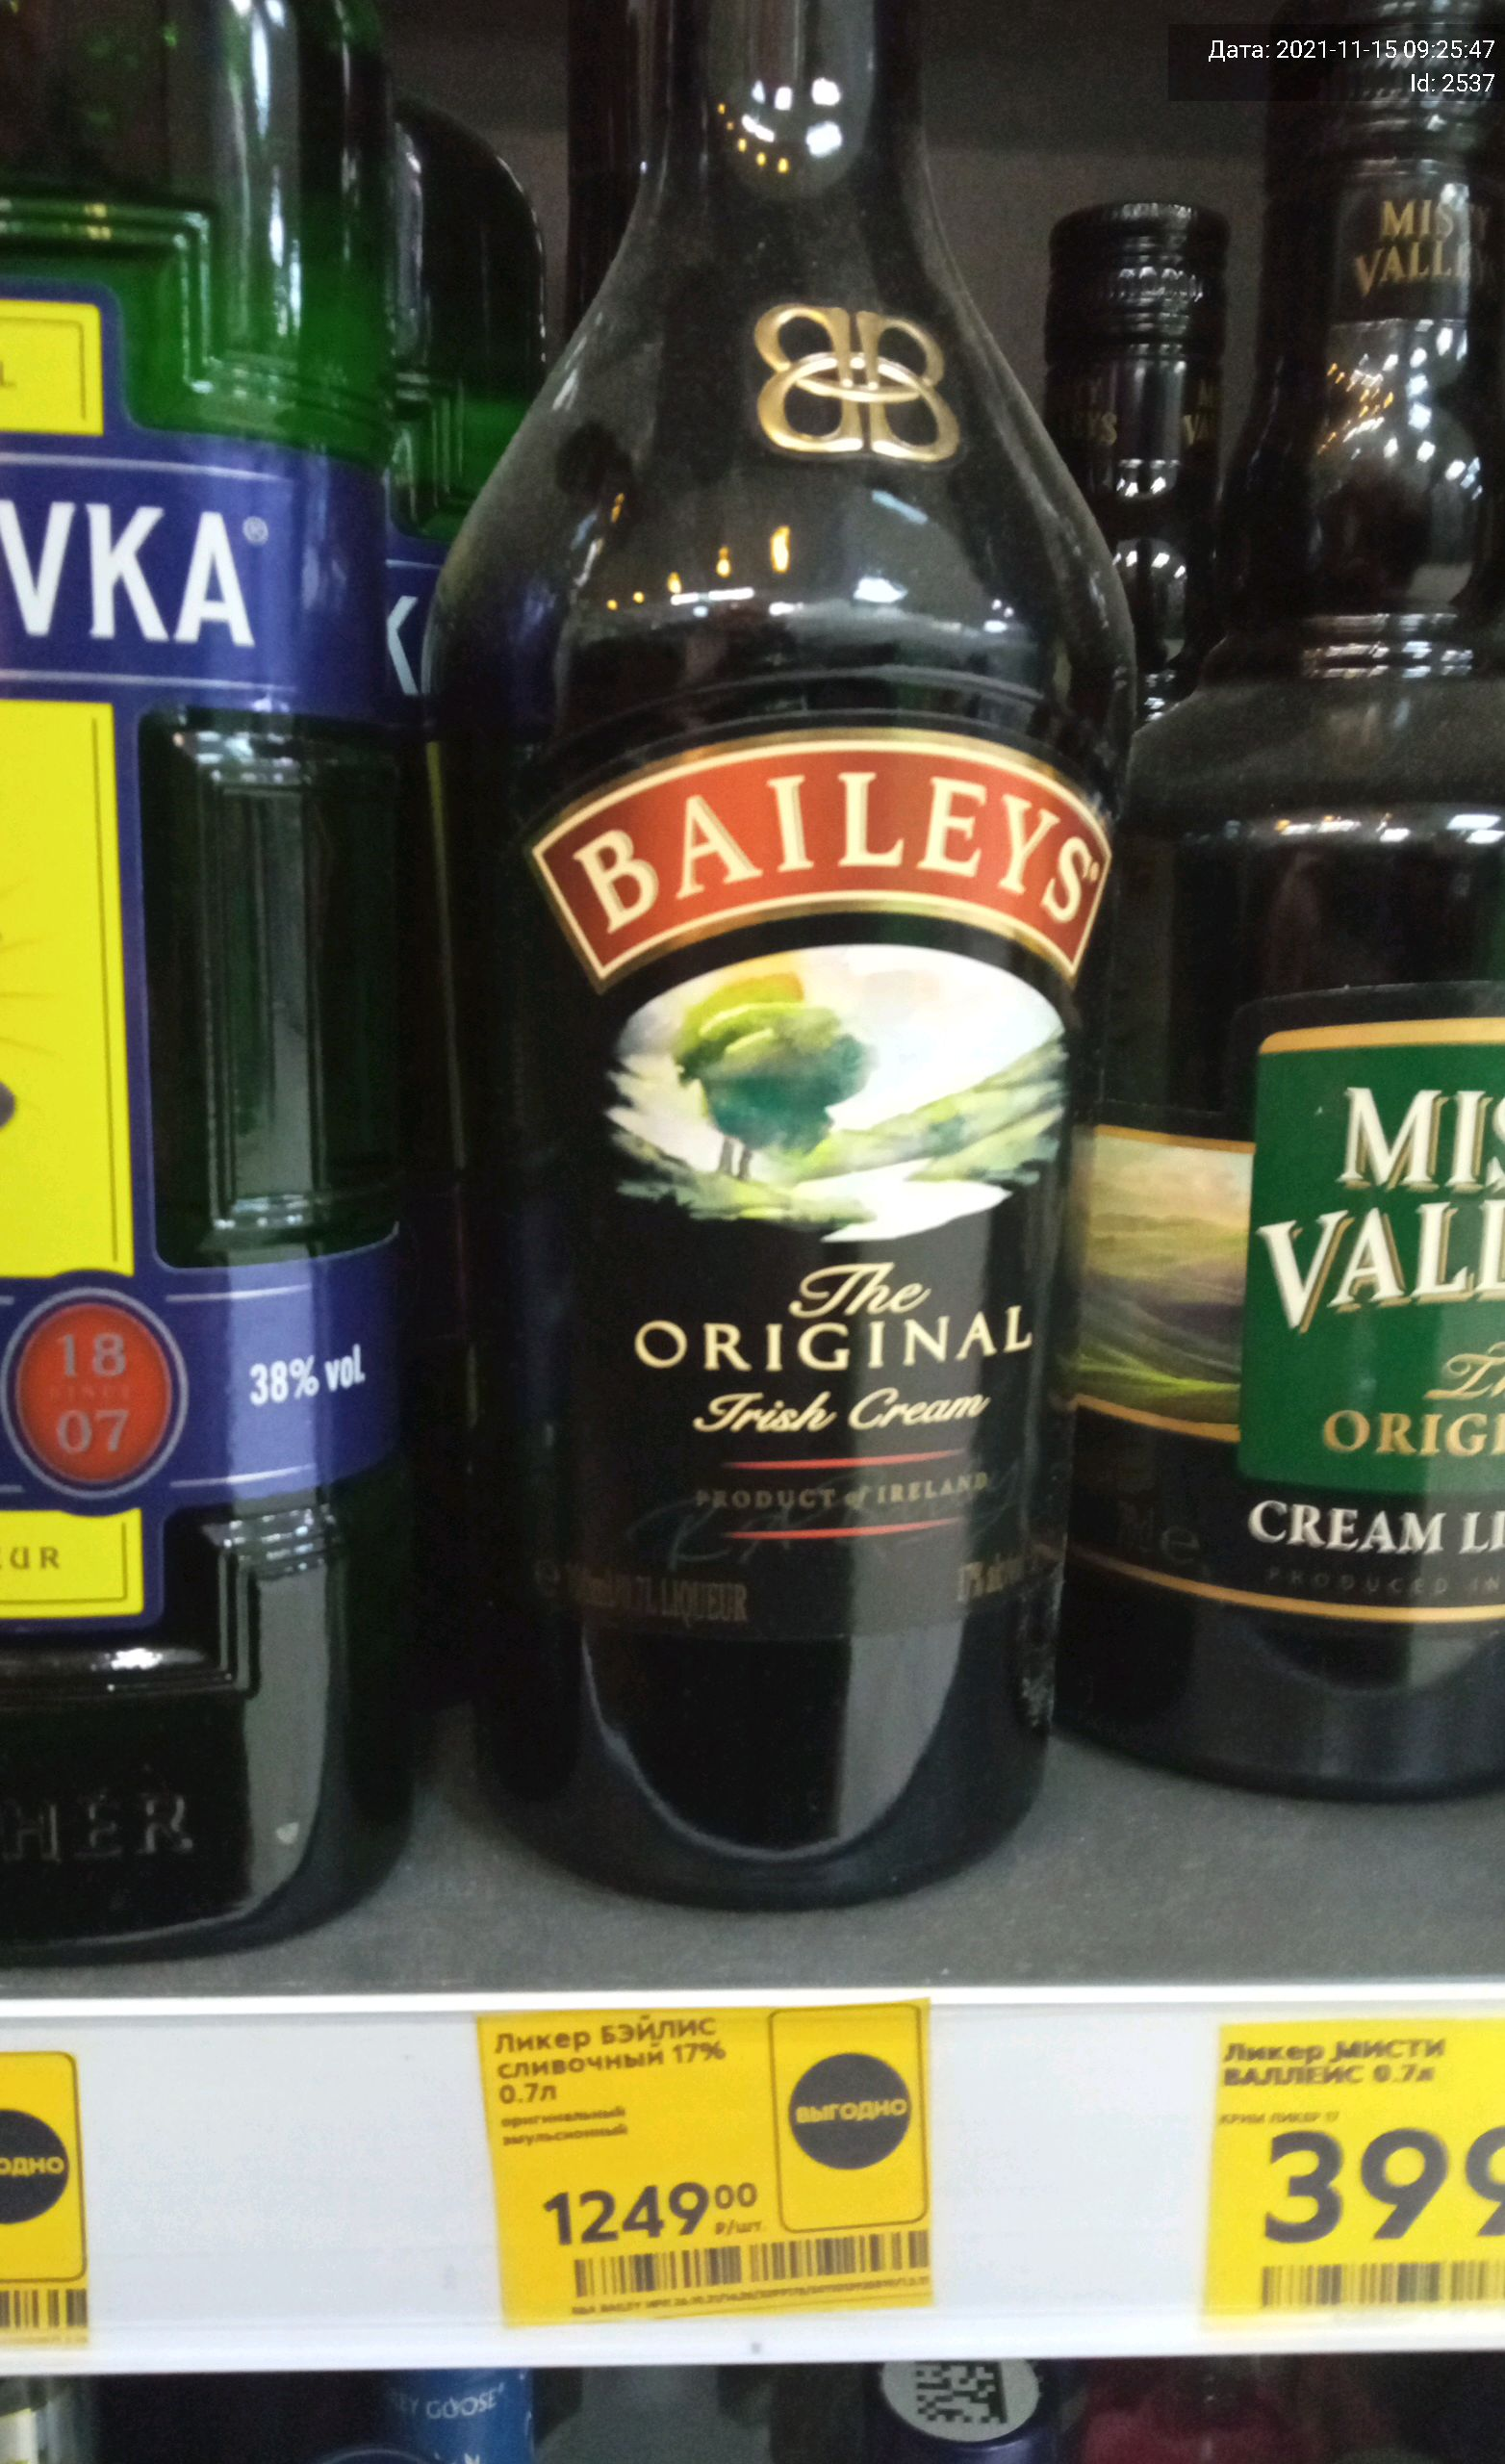

In [2]:
image_path = 'test1.jpeg'
image = Image.open(image_path)
image

In [3]:
with open(image_path, "rb") as image_file:
    b64_image = base64.b64encode(image_file.read()).decode("utf-8")

response = client.chat.completions.create(
    model="Qwen/Qwen2.5-VL-3B-Instruct-AWQ",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text", 
                    "text": '''
                    Какой товар изображен на фото, какое название написано на ценнике, какая у него цена и какие координаты ценника в относительных значения от 0 до 1 в формате xywh? 
                    Дай ответ в формате json.
                    Пример ответа: {"product": "Milk", "pricetag_title": "Milk 1l", "price": "121.99", "x_left": 0.1, "y_top": 0.4, "width": 0.3, "height": 0.2}
                    '''
                },
                {"type": "image_url", "image_url": {'url': f"data:image/jpeg;base64,{b64_image}"}},
            ],
        }
    ],
    response_format={
        "type": "json_schema",
        "json_schema": {
            "name": "output_schema",
            "schema": {
                "type": "object",
                "properties": {
                    "product": {
                        "type": "string"
                    },
                    "pricetag_title": {
                        "type": "string"
                    },
                    "price": {
                        "type": "string"
                    },
                    "x_left": {
                        "type": "number",
                        "minimum": 0,
                        "maximum": 1
                    },
                    "y_top": {
                        "type": "number",
                        "minimum": 0,
                        "maximum": 1
                    },
                    "width": {
                        "type": "number",
                        "minimum": 0,
                        "maximum": 1
                    },
                    "height": {
                        "type": "number",
                        "minimum": 0,
                        "maximum": 1
                    },
                },
                "required": ["product", "pricetag_title", "price", "x_left", "y_top", "width", "height"],
                "additionalProperties": False
            }
        }
    },
)
    
result = json.loads(response.choices[0].message.content)
result

NotFoundError: Error code: 404 - {'object': 'error', 'message': 'The model `google/gemma-3-27b-it:free` does not exist.', 'type': 'NotFoundError', 'param': None, 'code': 404}

In [ ]:
response.choices[0].message.content

In [ ]:
    
result = json.loads(response.choices[0].message.content[8:-4])
result

In [ ]:
from PIL import Image, ImageDraw

def draw_bounding_box(image, relative_coords, color="red", width=2):

    img_width, img_height = image.size

    # Преобразование относительных координат в абсолютные
    x_rel, y_rel, w_rel, h_rel = relative_coords
    x = x_rel * img_width
    y = y_rel * img_height
    w = w_rel * img_width
    h = h_rel * img_height

    # Ограничение координат границами изображения
    x0 = max(0, x)
    y0 = max(0, y)
    x1 = min(img_width, x + w)
    y1 = min(img_height, y + h)

    # Рисование рамки
    draw = ImageDraw.Draw(image)
    draw.rectangle([x0, y0, x1, y1], outline=color, width=width)

# Пример использования:
draw_bounding_box(
    image,
    relative_coords=[
        result['x_left'], 
        result['y_top'], 
        result['width'], 
        result['height']
    ], 
    color="green",
    width=3
)

In [ ]:
image